#📌 Extracción

In [1]:
import requests
import pandas as pd

# URL del archivo JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Descargar el contenido JSON
response = requests.get(url)
data = response.json()  # Carga el JSON como lista/dict

# Convertir a DataFrame (aquí aplanando datos anidados según sea necesario)
df = pd.json_normalize(data)

# Mostrar las primeras filas del DataFrame
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#🔧 Transformación

In [2]:
import requests
import pandas as pd

# Descargar y preparar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Resumen general
print("Resumen general:")
print(df.describe(include='all'))

# Tasa de churn por contrato
print("\nTasa de churn por contrato:")
print(df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack())

# Tasa de churn por género
print("\nTasa de churn por género:")
print(df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack())

# Estadísticas de cargos mensuales
print("\nEstadísticas de cargos mensuales:")
print(df['account.Charges.Monthly'].describe())

# Estadísticas de cargos totales
print("\nEstadísticas de cargos totales:")
print(df['account.Charges.Total'].describe())

# Distribución de antigüedad (tenure)
print("\nDistribución de antigüedad de clientes (tenure):")
print(df['customer.tenure'].value_counts().sort_index())

Resumen general:
        customerID Churn customer.gender  customer.SeniorCitizen  \
count         7267  7267            7267             7267.000000   
unique        7267     3               2                     NaN   
top     9995-HOTOH    No            Male                     NaN   
freq             1  5174            3675                     NaN   
mean           NaN   NaN             NaN                0.162653   
std            NaN   NaN             NaN                0.369074   
min            NaN   NaN             NaN                0.000000   
25%            NaN   NaN             NaN                0.000000   
50%            NaN   NaN             NaN                0.000000   
75%            NaN   NaN             NaN                0.000000   
max            NaN   NaN             NaN                1.000000   

       customer.Partner customer.Dependents  customer.tenure  \
count              7267                7267      7267.000000   
unique                2               

#📊 Carga y análisis

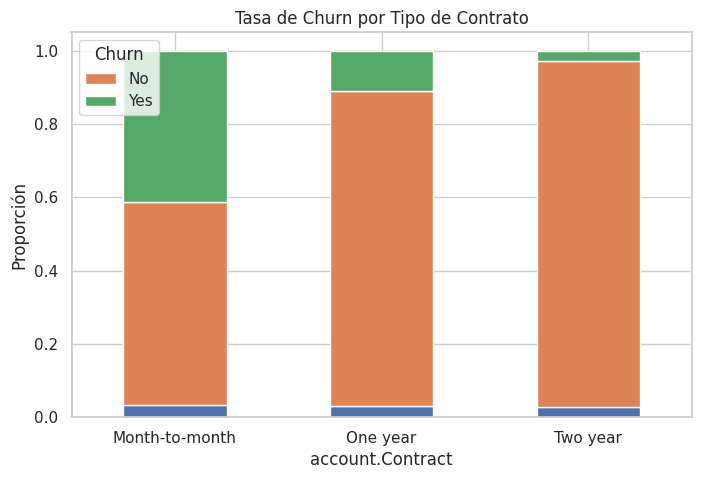

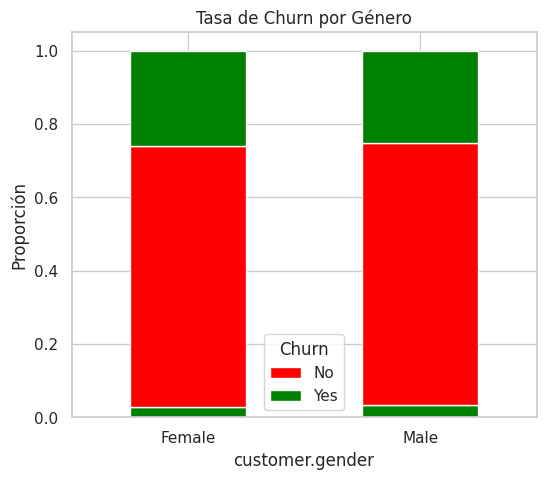

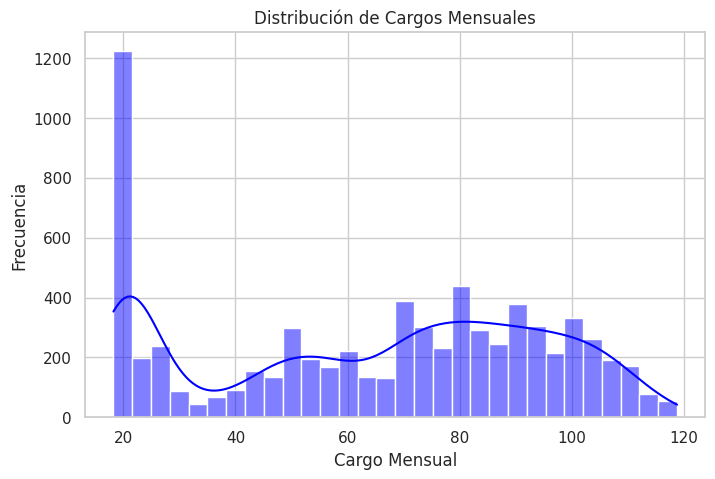

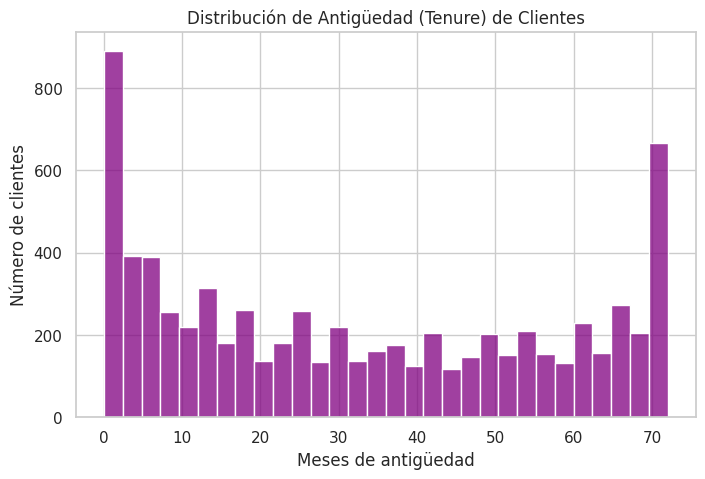

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar y preparar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Configuración general para gráficos
sns.set(style="whitegrid")

# 1. Tasa de churn por contrato
churn_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()
churn_contrato.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Tasa de Churn por Tipo de Contrato')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

# 2. Tasa de churn por género
churn_genero = df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack()
churn_genero.plot(kind='bar', stacked=True, figsize=(6,5), color=['green', 'red'])
plt.title('Tasa de Churn por Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

# 3. Distribución de cargos mensuales
plt.figure(figsize=(8,5))
sns.histplot(df['account.Charges.Monthly'], bins=30, kde=True, color='blue')
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargo Mensual')
plt.ylabel('Frecuencia')
plt.show()

# 4. Distribución de antigüedad (tenure)
plt.figure(figsize=(8,5))
sns.histplot(df['customer.tenure'], bins=30, kde=False, color='purple')
plt.title('Distribución de Antigüedad (Tenure) de Clientes')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Número de clientes')
plt.show()

#📄Informe final

Churn por contrato:
Churn                             No       Yes
account.Contract                              
Month-to-month    0.032459  0.554307  0.413233
One year          0.030283  0.860434  0.109282
Two year          0.027539  0.944923  0.027539

Churn por género:
Churn                            No       Yes
customer.gender                              
Female           0.028953  0.709633  0.261414
Male             0.032653  0.714286  0.253061

Churn por segmento de cargo mensual:
Churn                           No       Yes
MonthlySegment                              
Bajo            0.034034  0.814286  0.151681
Medio           0.027609  0.690688  0.281703
Alto            0.030545  0.640000  0.329455

Churn por antigüedad:
Churn                          No       Yes
TenureSegment                              
0-12           0.035049  0.504880  0.460071
13-24          0.020096  0.698565  0.281340
25-60          0.031923  0.790503  0.177574
60+            0.030324  0.905582  0

<Figure size 800x400 with 0 Axes>

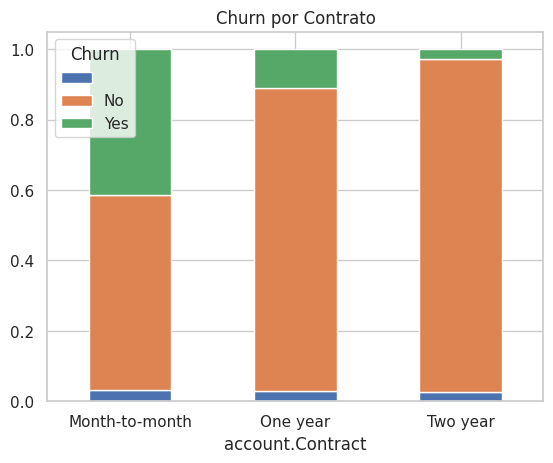

<Figure size 600x400 with 0 Axes>

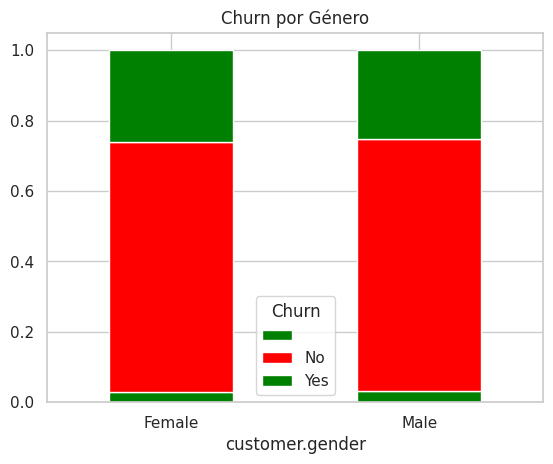

In [9]:
# 1. Churn alto en contrato Month-to-month, bajo en contratos largos:
churn_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()
print("Churn por contrato:")
print(churn_contrato)

# 2. Mujeres tienen ligeramente mayor churn que hombres:
churn_genero = df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por género:")
print(churn_genero)

# 3. Clientes con cargos mensuales bajos tienen mayor churn:
df['MonthlySegment'] = pd.cut(df['account.Charges.Monthly'], bins=[0,50,80,200], labels=['Bajo','Medio','Alto'])
churn_cargo = df.groupby('MonthlySegment', observed=True)['Churn'].value_counts(normalize=True).unstack()

print("\nChurn por segmento de cargo mensual:")
print(churn_cargo)

# 4. Clientes con antigüedad menor a 12 meses presentan churn más alto:
df['TenureSegment'] = pd.cut(df['customer.tenure'], bins=[0,12,24,60,100], labels=['0-12','13-24','25-60','60+'])
churn_tenure = df.groupby('TenureSegment', observed=True)['Churn'].value_counts(normalize=True).unstack()

print("\nChurn por antigüedad:")
print(churn_tenure)

# 5. Clientes con método de pago automático retienen mejor:
churn_pago = df.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por método de pago:")
print(churn_pago)

# Gráficos para visualización rápida
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
churn_contrato.plot(kind='bar', stacked=True)
plt.title('Churn por Contrato')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
churn_genero.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Churn por Género')
plt.xticks(rotation=0)
plt.show()